<a href="https://colab.research.google.com/github/nutsuphakit/Meta_Stock_Price_Analysis_by_Moving_Average/blob/main/Boonme_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
transaction_df = pd.read_csv('/transaction.csv')
transaction_df.head()

,date,hour,user_id,province
0,2021-09-16,18:00,1,Sukhothai
1,2021-09-17,06:00,1,Phayao
2,2021-09-16,23:00,1,Phrae
3,2021-09-16,11:00,1,Phrae
4,2021-11-20,04:00,1,Phayao


In [ ]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41695 entries, 0 to 41694
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      41695 non-null  object
 1   hour      41695 non-null  object
 2   user_id   41695 non-null  int64 
 3   province  41695 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [ ]:
user_df = pd.read_csv('/user.csv')
user_df.head()

,user_id,hometown
0,1,Phrae
1,2,Pathum Thani
2,3,Ratchaburi
3,4,Chai Nat
4,5,Phrae


In [ ]:
transaction_df['date'] = pd.to_datetime(transaction_df['date'])
transaction_df['hour'] = pd.to_timedelta(transaction_df['hour'] + ':00')

In [ ]:
transaction_df['datetime'] = pd.to_datetime(transaction_df['date']) + pd.to_timedelta(transaction_df['hour'], unit='h')
transaction_df.head()

,date,hour,user_id,province,datetime
0,2021-09-16,0 days 18:00:00,1,Sukhothai,2021-09-16 18:00:00
1,2021-09-17,0 days 06:00:00,1,Phayao,2021-09-17 06:00:00
2,2021-09-16,0 days 23:00:00,1,Phrae,2021-09-16 23:00:00
3,2021-09-16,0 days 11:00:00,1,Phrae,2021-09-16 11:00:00
4,2021-11-20,0 days 04:00:00,1,Phayao,2021-11-20 04:00:00


In [ ]:
df = transaction_df.merge(user_df, on='user_id')
df.head()

,date,hour,user_id,province,datetime,hometown
0,2021-09-16,0 days 18:00:00,1,Sukhothai,2021-09-16 18:00:00,Phrae
1,2021-09-17,0 days 06:00:00,1,Phayao,2021-09-17 06:00:00,Phrae
2,2021-09-16,0 days 23:00:00,1,Phrae,2021-09-16 23:00:00,Phrae
3,2021-09-16,0 days 11:00:00,1,Phrae,2021-09-16 11:00:00,Phrae
4,2021-11-20,0 days 04:00:00,1,Phayao,2021-11-20 04:00:00,Phrae


In [ ]:
df = df.sort_values(['user_id', 'datetime'])
df.head()

,date,hour,user_id,province,datetime,hometown
3,2021-09-16,0 days 11:00:00,1,Phrae,2021-09-16 11:00:00,Phrae
0,2021-09-16,0 days 18:00:00,1,Sukhothai,2021-09-16 18:00:00,Phrae
2,2021-09-16,0 days 23:00:00,1,Phrae,2021-09-16 23:00:00,Phrae
1,2021-09-17,0 days 06:00:00,1,Phayao,2021-09-17 06:00:00,Phrae
8,2021-11-19,0 days 13:00:00,1,Phrae,2021-11-19 13:00:00,Phrae


In [ ]:
trips = []

for user_id, group in df.groupby('user_id'):
    hometown = group['hometown'].iloc[0]
    in_trip = False
    trip = []

    for _, row in group.iterrows():
        if not in_trip and row['province'] == hometown:
            continue
        elif not in_trip:
            # Start new trip
            trip = [row]
            in_trip = True
        elif in_trip and row['province'] != hometown:
            trip.append(row)
        elif in_trip and row['province'] == hometown:
            trip.append(row)
            # End of trip
            trip_df = pd.DataFrame(trip)
            start_date = trip_df['datetime'].min().date()
            end_date = trip_df['datetime'].max().date()
            provinces = trip_df['province'].unique().tolist()
            province_list = [p for p in provinces if p != hometown]
            num_provinces = len(province_list)

            trips.append({
                'user_id': user_id,
                'start_date': start_date,
                'end_date': end_date,
                'province_list': ', '.join(province_list),
                'num_provinces': num_provinces

            })
            in_trip = False
            trip = []


In [ ]:
# Final output
trip_df = pd.DataFrame(trips)
trip_df = trip_df.merge(user_df, on='user_id')
trip_df['trip_id'] = range(1, len(trip_df) + 1)
trip_df = trip_df[['trip_id', 'user_id', 'start_date', 'end_date', 'province_list','hometown','num_provinces']]

print(trip_df)

       trip_id  user_id  start_date    end_date  \
0            1        1  2021-09-16  2021-09-16   
1            2        1  2021-09-17  2021-11-19   
2            3        1  2021-11-19  2021-12-20   
3            4        1  2021-12-20  2021-12-20   
4            5        1  2021-12-25  2021-12-25   
...        ...      ...         ...         ...   
10553    10554     1000  2021-12-23  2021-12-23   
10554    10555     1000  2021-12-24  2021-12-29   
10555    10556     1000  2021-12-29  2021-12-30   
10556    10557     1000  2021-12-30  2021-12-31   
10557    10558     1000  2021-12-31  2021-12-31   

                                province_list hometown  num_provinces  
0                                   Sukhothai    Phrae              1  
1                                      Phayao    Phrae              1  
2      Sukhothai, Lampang, Phayao, Chiang Rai    Phrae              4  
3                                     Lampang    Phrae              1  
4                         B

In [ ]:
trip_df.to_csv('/trips.csv')

In [ ]:
most_provinces_trip = trip_df.sort_values('num_provinces', ascending=False).head(1)

print(most_provinces_trip)

      trip_id  user_id  start_date    end_date  \
7500     7501      717  2021-01-02  2021-07-06   

                                          province_list      hometown  \
7500  Bangkok, Pathum Thani, Saraburi, Lop Buri, Nak...  Samut Prakan   

      num_provinces  
7500             12  


In [ ]:
from itertools import combinations
from collections import Counter

# Create list of all province pairs across all trips
pair_counter = Counter()

for trip in trips:
    province_list = trip['province_list'].split(', ')
    unique_provinces = sorted(set(province_list))
    for pair in combinations(unique_provinces, 2):
        pair_counter[pair] += 1

# Convert to DataFrame for display
pair_df = pd.DataFrame([
    {'province_1': p1, 'province_2': p2, 'count': count}
    for (p1, p2), count in pair_counter.items()
])

# Optional: sort by count descending
pair_df = pair_df.sort_values('count', ascending=False)

print(pair_df)

        province_1                province_2  count
57      Nonthaburi              Pathum Thani    478
49    Pathum Thani  Phra Nakhon Si Ayutthaya    429
48         Bangkok              Pathum Thani    391
43   Nakhon Pathom              Samut Sakhon    387
55      Ratchaburi              Samut Sakhon    358
..             ...                       ...    ...
503    Phetchaburi              Prachin Buri      1
506      Sing Buri                      Trat      1
507        Phichit                      Trat      1
508    Phitsanulok                      Trat      1
510     Chiang Mai                  Lop Buri      1

[511 rows x 3 columns]


In [ ]:
# STEP 1: Prepare datetime
transaction_df['date'] = pd.to_datetime(transaction_df['date'])
transaction_df['datetime'] = transaction_df['date'] + transaction_df['hour']

# STEP 2: Merge trip info to transaction
trip_data = transaction_df.merge(
    trip_df[['trip_id', 'user_id', 'start_date', 'end_date']],
    on='user_id'
)

# Filter to include only rows within trip range
trip_data = trip_data[
    (trip_data['datetime'].dt.date >= trip_data['start_date']) &
    (trip_data['datetime'].dt.date <= trip_data['end_date'])
]

# STEP 3: Count distinct days per trip + province
sleep_candidates = (
    trip_data
    .groupby(['trip_id', 'province','user_id'])['date']
    .nunique()
    .reset_index()
    .rename(columns={'date': 'num_days'})
)

# Keep only province with >= 2 days → slept there
sleep_province = sleep_candidates[sleep_candidates['num_days'] >= 2]

# STEP 4: Get final destination of each trip
last_stop = (
    trip_data.sort_values(['trip_id', 'datetime'])
    .groupby('trip_id')
    .last()
    .reset_index()[['trip_id', 'province']]
    .rename(columns={'province': 'destination_province'})
)



# STEP 5: Merge + exclude final province
sleep_province = sleep_province.merge(last_stop, on='trip_id')
sleep_province = sleep_province[sleep_province['province'] != sleep_province['destination_province']]

# STEP 5.1 Merge + exclude hometown
sleep_province = sleep_province.merge(user_df[['user_id', 'hometown']], on='user_id')
sleep_province = sleep_province[sleep_province['destination_province'] != sleep_province['hometown']]

# STEP 6: Count top provinces people sleep in (but not final)
top_sleepovers = (
    sleep_province['province']
    .value_counts()
    .head(5)
    .reset_index()
    .rename(columns={'index': 'province', 'province': 'sleepover_count'})
)

print(sleep_province)


      trip_id      province  user_id  num_days      destination_province  \
2          16  Pathum Thani        2         2                   Bangkok   
4          20  Pathum Thani        2         2  Phra Nakhon Si Ayutthaya   
5          24    Ratchaburi        3         2               Phetchaburi   
6          25    Ratchaburi        3         2               Suphan Buri   
7          25  Samut Sakhon        3         2               Suphan Buri   
...       ...           ...      ...       ...                       ...   
4048    10540     Sing Buri      998         2                 Ang Thong   
4049    10542    Chiang Rai      999         2                Chiang Mai   
4050    10549    Chiang Rai      999         2                   Lampang   
4051    10555       Bangkok     1000         2              Pathum Thani   
4052    10556       Bangkok     1000         2               Phetchaburi   

          hometown  
2     Pathum Thani  
4     Pathum Thani  
5       Ratchaburi  
6  

In [ ]:
main_provinces = [
    "Bangkok", "Chiang Mai", "Phuket", "Pattaya", "Krabi",
    "Ayutthaya", "Chiang Rai", "Sukhothai", "Pathum Thani", "Nonthaburi",
    "Nakhon Pathom", "Samut Sakhon", "Samut Prakan"
]
sleep_province_secondary = sleep_province[~sleep_province['destination_province'].isin(main_provinces)]

top_sleepovers = (
    sleep_province_secondary['destination_province']
    .value_counts()
    .head(5)
    .reset_index()
    .rename(columns={'index': 'destination_province', 'destination_province': 'sleep_province_secondary_count'})
)

print(top_sleepovers)

  sleep_province_secondary_count  count
0       Phra Nakhon Si Ayutthaya    154
1                   Chachoengsao    102
2                     Ratchaburi     98
3                    Suphan Buri     98
4                        Lampang     70


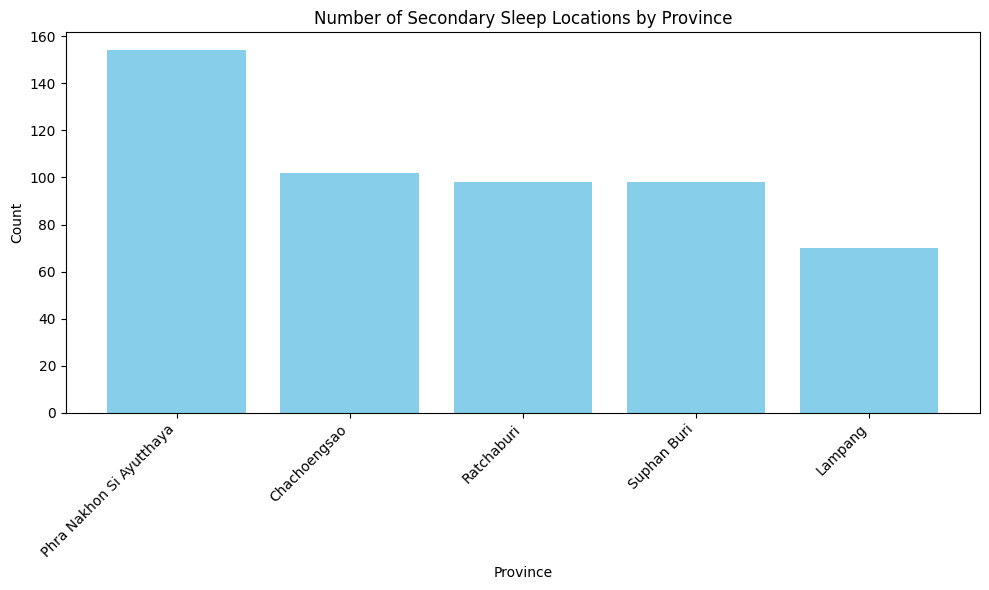

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(top_sleepovers['sleep_province_secondary_count'], top_sleepovers['count'], color='skyblue')
plt.title('Number of Secondary Sleep Locations by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()